### Imports

In [1]:
import random
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

### Data understanding
Hier wordt de data ingeladen en kijken we even naar wat we precies voor data hebben en welke eigenschappen die data heeft. De data hoeft niet gecleant te worden omdat het al een goede, schone dataset is. bron: https://medium.com/analytics-vidhya/skip-the-data-preprocessing-accessing-12-ready-to-go-datasets-829e53f2d78

In [2]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [3]:
print(len(train_X))
print(len(train_Y))

50000
50000


In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
type(train_X)

numpy.ndarray

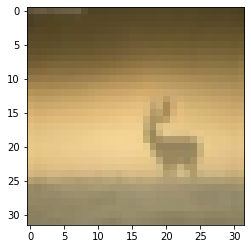

In [7]:
plt.imshow(train_X[random.randint(0,49999)])

In [8]:
train_Y=utils.to_categorical(train_Y)
test_Y=utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

### Het model & trainen

In [9]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2)) #20%

model.add(Conv2D(32,(3,3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [12]:
history = model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 88s 56ms/step - loss: 1.7981 - accuracy: 0.3476 - val_loss: 1.1793 - val_accuracy: 0.5867
Epoch 2/20
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1850 - accuracy: 0.5764 - val_loss: 1.0293 - val_accuracy: 0.6371
Epoch 3/20
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0329 - accuracy: 0.6322 - val_loss: 0.9827 - val_accuracy: 0.6526
Epoch 4/20
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9563 - accuracy: 0.6601 - val_loss: 0.9634 - val_accuracy: 0.6584
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8927 - accuracy: 0.6844 - val_loss: 0.9103 - val_accuracy: 0.6798
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8441 - accuracy: 0.7036 - val_loss: 0.9009 - val_accuracy: 0.6906
Epoch 7/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8019 - accuracy: 0.7184 - val_loss: 0.8962 -

### De resultaten
Hier worden twee grafieken weergegeven met daarin de accuracy en de loss.

De accuracy is 80%, dat is niet weinig maar ook niet goed genoeg om 'echt' gebruikt te worden, de loss is ook nog te hoog. Daarom is het niet aanteraden om dit model te gebruiken, door tijds noot heb ik niet de tijd om een beter model te maken of de data beter te maken.

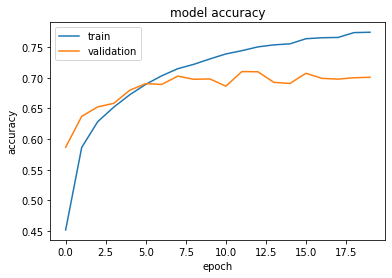

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()    

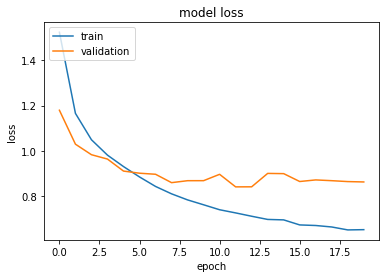

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Overfit?
Ja, dit model is overfit omdat het model het slechter doet op de test set dan op de train set.